Shape of data :  (1000, 1)


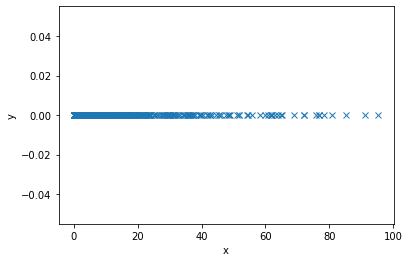

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import expon
# Using random and softmax to generate random numbers
import random
from scipy.special import softmax

# Reading the dataset
df=pd.read_csv('A2Q1.csv', sep=',',header=None)
data = df.values
print("Shape of data : ", np.shape(data))

val = 0. 
arr = data 
plt.plot(arr, np.zeros_like(arr) + val, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

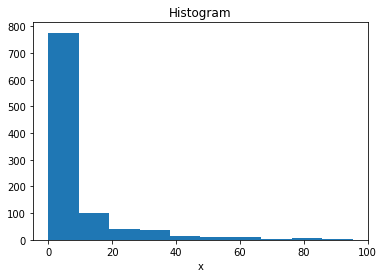

In [ ]:
x = data
plt.hist(x)
plt.title('Histogram')
plt.xlabel('x')
plt.show() 

In [ ]:
X = np.reshape(data, (1000, ))
print(np.shape(X))

(1000,)


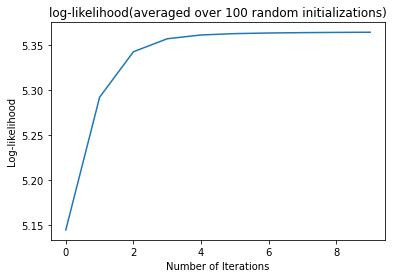

In [ ]:
class Mixture_of_exponentials:
  def __init__(self, X, iterations):
    self.iterations = iterations
    self.X = X
    self.lamda = None
    self.pi = None

  def fit(self):
    
    likelihoods = np.zeros(self.iterations)

    for iter in range(100):

      # Random Initialization of lamda 
      self.lamda = []
      for i in range(4):
        self.lamda.append(random.uniform(0.1, 1))
      
      # Random Initialization of pi
      nums = []
      for i in range(4):
        nums.append(random.uniform(0.1, 1))
      self.pi = softmax(nums)


      log_likelihoods = np.zeros(self.iterations)

      
      for iteration in range(self.iterations):

        
        gamma = np.zeros((len(X), 4))

        for j, k, l in zip(range(4),[expon(loc=0, scale=1/self.lamda[0]),  expon(loc=0, scale=1/self.lamda[1]), expon(loc=0, scale=1/self.lamda[2]), expon(loc=0, scale=1/self.lamda[3])],self.pi):
          gamma[:,j] = l*k.pdf(X)  

        for i in range(len(gamma)):
          gamma[i] = gamma[i]/(np.sum(self.pi)*np.sum(gamma,axis=1)[i])


        M = []

        for x in range(len(gamma[0])):
          m = np.sum(gamma[:,x])
          M.append(m) 

        for y in range(len(M)):
          self.pi[y] = (M[y]/np.sum(M)) 

        self.lamda = 1/(np.sum(self.X.reshape(len(self.X),1)*gamma,axis=0)/M)
        
        log_likelihoods[iteration] = np.log(np.sum([k*expon(loc=0, scale=1/self.lamda[i]).pdf(X) for k,i in zip(self.pi,range(len(self.lamda)))]))

      likelihoods = likelihoods + log_likelihoods

    return likelihoods/100

instance = Mixture_of_exponentials(X, 10)
val = instance.fit() 
plt.xlabel("Number of Iterations")
plt.ylabel("Log-likelihood")
plt.title("log-likelihood(averaged over 100 random initializations)")  
plt.plot(val)         